In [1]:
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from plotnine import *

In [2]:
import io
#to predictive A
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error


In [7]:
sales=pd.read_csv('/content/drive/MyDrive/BDA_CSV/sales_data.csv',encoding='unicode_escape')

In [8]:
sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
sales['InvoiceDate']=pd.to_datetime(sales['InvoiceDate'])
#날짜 컬럼을 시계열 데이터로 변환

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
df = sales.copy()

In [13]:
#수량이나 단위가격이 음수인 경우는 이상치라 생각하고 양수인 값만 갖고 진행
df = df[df.Quantity>0]
df = df[df.UnitPrice>0]

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [16]:
df.describe() #모두 양수값이 된것을 확인 가능

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [17]:
#전체 가격 확인을 위해 tp(total price)컬럼 생성
#tp가 우리가 예측할 변수임
df['tp'] = df['Quantity']*df['UnitPrice']

In [18]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,tp
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [19]:
df_sp = df[['InvoiceDate','tp']]

In [20]:
df_sp.rename(columns={'InvoiceDate':'ds','tp':'y'},inplace=True) #prophet을 사용하기 위해서 변수명을 꼭 ds,y로 설정

In [21]:
df_sp

,ds,y
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34
...,...,...
541904,2011-12-09 12:50:00,10.20
541905,2011-12-09 12:50:00,12.60
541906,2011-12-09 12:50:00,16.60
541907,2011-12-09 12:50:00,16.60


- 일별로 주문량합치기

In [22]:
df_sp = df_sp.set_index('ds')
df_d = df_sp.resample('D')['y'].sum()
df_d=df_d.to_frame()
df_d

,y
ds,
2010-12-01,58960.79
2010-12-02,47748.38
2010-12-03,46943.71
2010-12-04,0.00
2010-12-05,31774.95
...,...
2011-12-05,88741.96
2011-12-06,56713.21
2011-12-07,75439.16


<Axes: xlabel='ds'>

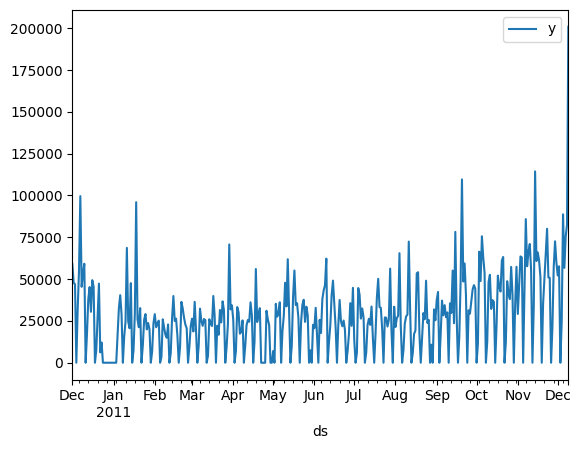

In [23]:
df_d.plot()

- 일별로 그래프 생성시 매출량이 약간씩 우상향 하는 것을 확인 가능
- 전형적인 시계열 그래프로 다른 특성은 아직 없음

In [24]:
#prophet을 사용하기 위해 다시 인덱스를 해제
df_d.reset_index(inplace=True)
df_d

,ds,y
0,2010-12-01,58960.79
1,2010-12-02,47748.38
2,2010-12-03,46943.71
3,2010-12-04,0.00
4,2010-12-05,31774.95
...,...,...
369,2011-12-05,88741.96
370,2011-12-06,56713.21
371,2011-12-07,75439.16
372,2011-12-08,82495.00


In [25]:
#train, test set으로 나누기
#train 데이터를 가지고 학습후 미래 30일을 예측하여 test데이터와 비교한다.
train = df_d[:334]
test = df_d[334:]

In [26]:
train

,ds,y
0,2010-12-01,58960.79
1,2010-12-02,47748.38
2,2010-12-03,46943.71
3,2010-12-04,0.00
4,2010-12-05,31774.95
...,...,...
329,2011-10-26,38059.43
330,2011-10-27,57291.72
331,2011-10-28,40565.70
332,2011-10-29,0.00


In [27]:
#일별로 판매량을 예측할 것이기 때문에 daily_seasomality를 사용
prophet=Prophet(daily_seasonality=True,growth='linear')
prophet.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8rjrsuaq/3xf6b6y1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8rjrsuaq/59th7ab8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63589', 'data', 'file=/tmp/tmp8rjrsuaq/3xf6b6y1.json', 'init=/tmp/tmp8rjrsuaq/59th7ab8.json', 'output', 'file=/tmp/tmp8rjrsuaq/prophet_modelth3mltlu/prophet_model-20230621070421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [28]:
future = prophet.make_future_dataframe(periods=40)
#뒤에 몇일을 예측할 것인가? 40일을 예측할 것 ->train이 40개이기 때문
forecast = prophet.predict(future)

In [29]:
ph_yhat=forecast[['ds','yhat']][334:] #예측한 값

In [30]:
ph_yhat

,ds,yhat
334,2011-10-31,38042.252834
335,2011-11-01,48973.131519
336,2011-11-02,40296.462846
337,2011-11-03,47928.738202
338,2011-11-04,38397.732011
339,2011-11-05,10115.463038
340,2011-11-06,23827.421392
341,2011-11-07,38610.651013
342,2011-11-08,49541.529697
343,2011-11-09,40864.861024


          ds          yhat    yhat_lower    yhat_upper
0 2010-12-01  29654.570583  12271.262442  47365.268147
1 2010-12-02  37159.751346  20537.141813  54844.120144
2 2010-12-03  27501.650563  12087.656858  44305.332688
3 2010-12-04   -907.713003 -17900.272590  16546.564711
4 2010-12-05  12677.150758  -4285.491492  29256.414986


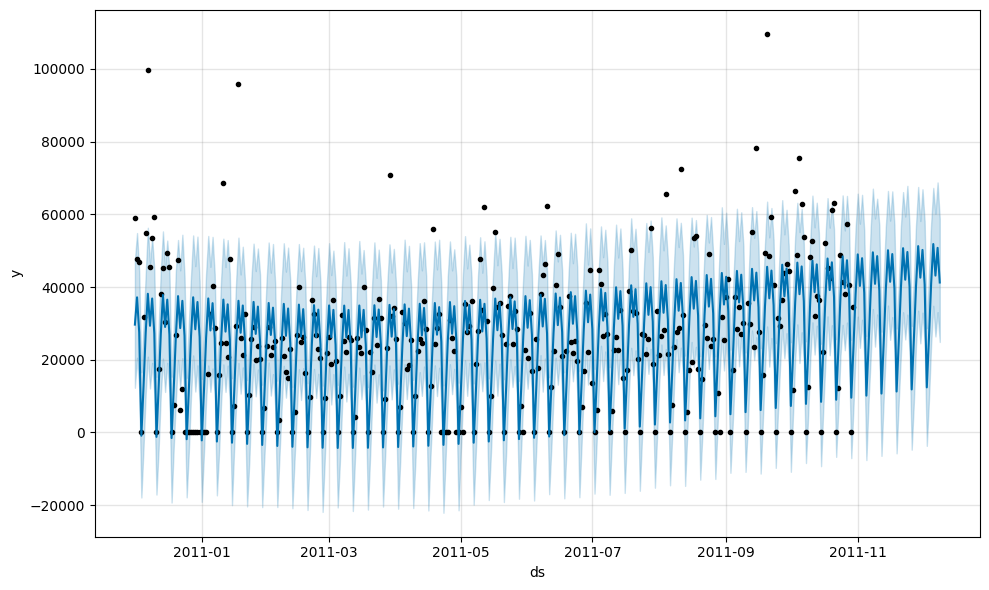

In [31]:
#forecast시각화
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())
prophet.plot(forecast)
plt.show()

- 데이터의 기간이 길어지면 평균으로 회귀한다.

In [32]:
test

,ds,y
334,2011-10-31,57369.15
335,2011-11-01,29155.15
336,2011-11-02,45888.34
337,2011-11-03,63561.49
338,2011-11-04,62977.36
339,2011-11-05,0.00
340,2011-11-06,42946.34
341,2011-11-07,85881.81
342,2011-11-08,57700.24
343,2011-11-09,66127.57


In [33]:
ph_yhat

,ds,yhat
334,2011-10-31,38042.252834
335,2011-11-01,48973.131519
336,2011-11-02,40296.462846
337,2011-11-03,47928.738202
338,2011-11-04,38397.732011
339,2011-11-05,10115.463038
340,2011-11-06,23827.421392
341,2011-11-07,38610.651013
342,2011-11-08,49541.529697
343,2011-11-09,40864.861024


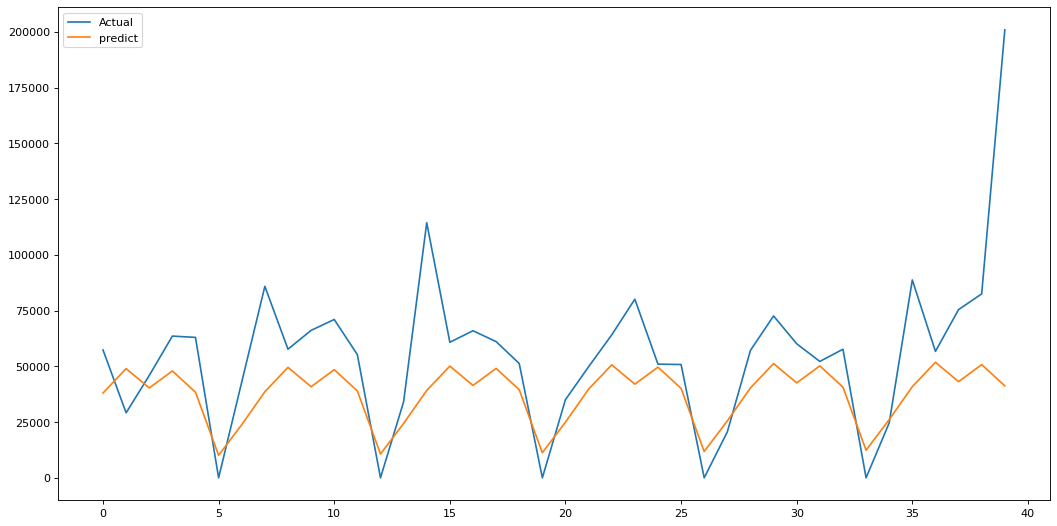

In [37]:
#예측값과 실제값을 비교하기
from matplotlib.pyplot import figure
figure(figsize =(16,8), dpi=80)
plt.plot(test['y'].values, label='Actual')
plt.plot(ph_yhat['yhat'].values, label = 'predict')
plt.legend()
plt.show()

- 실제값은 주기성이 없이 변화폭이 크지만, 예측값은 주기성이 있고 실제값에 비해 정상성을 보인다.

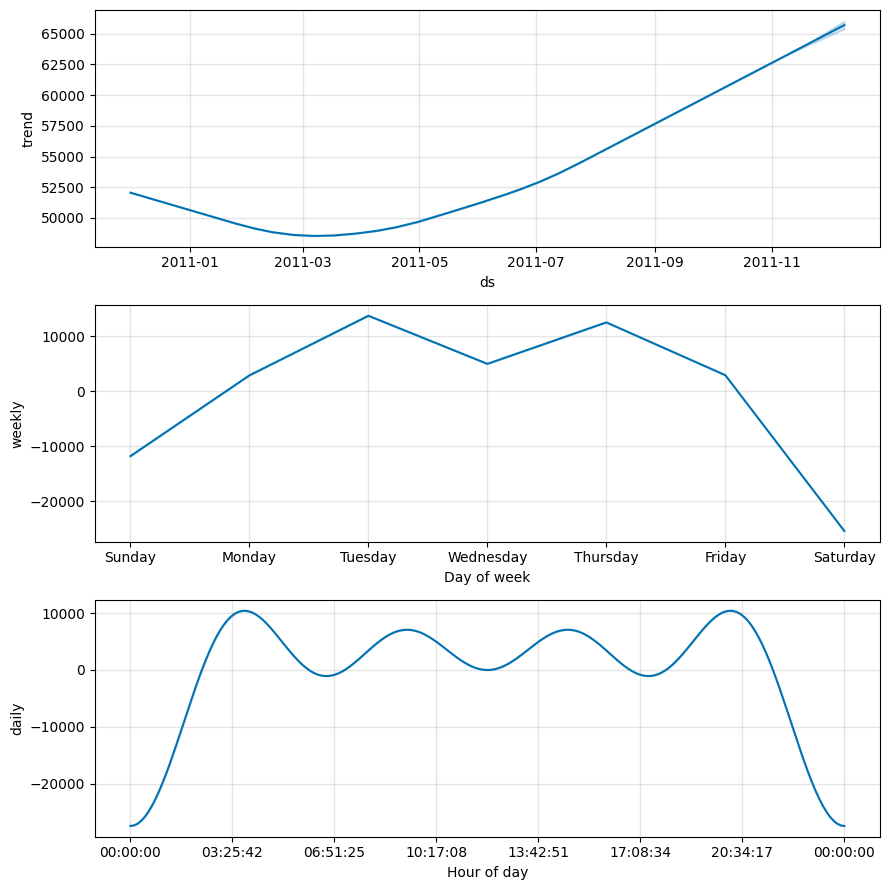

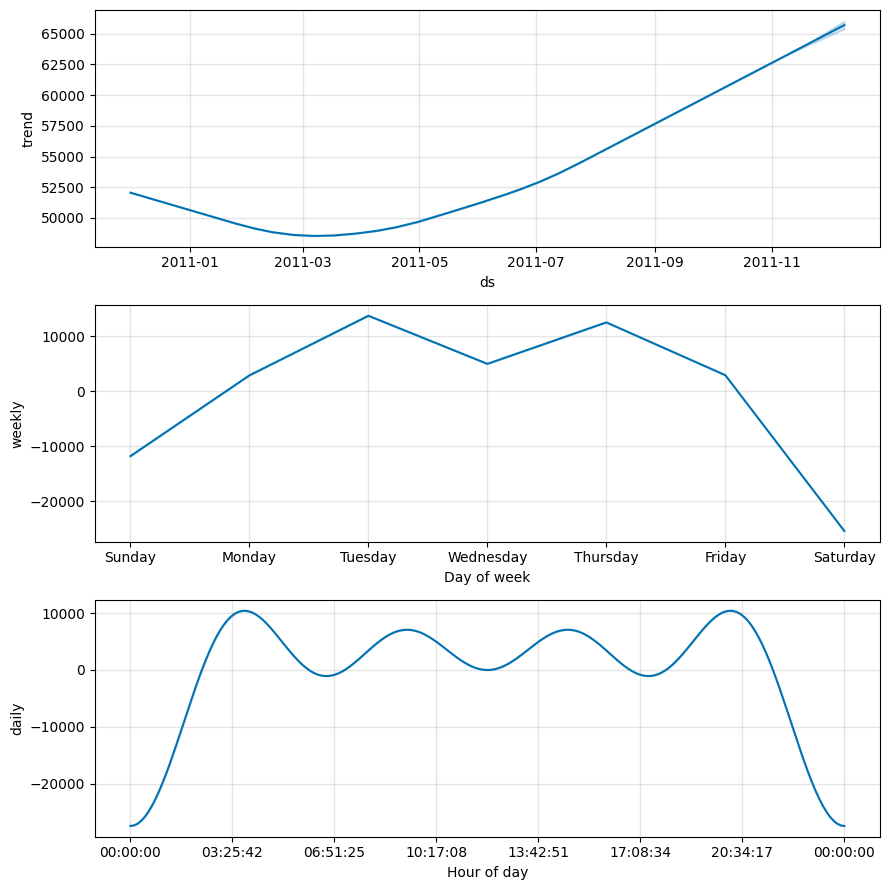

In [38]:
# 요일에 대한 트렌드 확인하기
prophet.plot_components(forecast)